In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
column_names = ["letter", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]
dataset = pd.read_csv(url, names=column_names)

# Preprocess the dataset
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data = (X_test, y_test),verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1088      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 26)                1690      
                                                                 
Total params: 6,938
Trainable params: 6,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 1.8596 - accuracy: 0.4852 - val_loss: 1.1524 - val_accuracy: 0.6802
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 1.0221 - accuracy: 0.7115 - val_loss: 0.8825 - val_accuracy: 0.7588
Epoch 3/10
500/500 [============

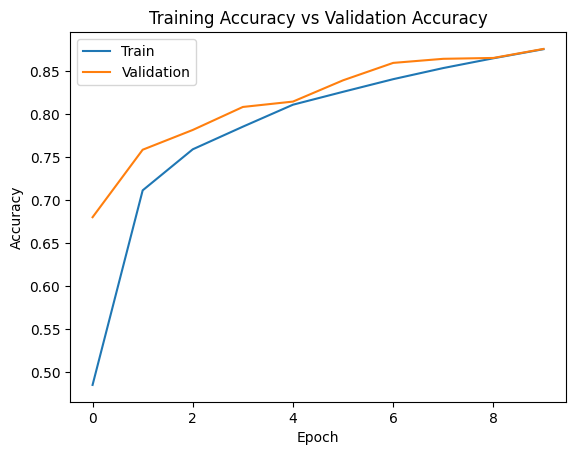

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()